<a href="https://colab.research.google.com/github/A714104/codsoft/blob/main/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Mo

<ipython-input-2-e176161b68b9>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)  # Fill missing age with median age
<ipython-input-2-e176161b68b9>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

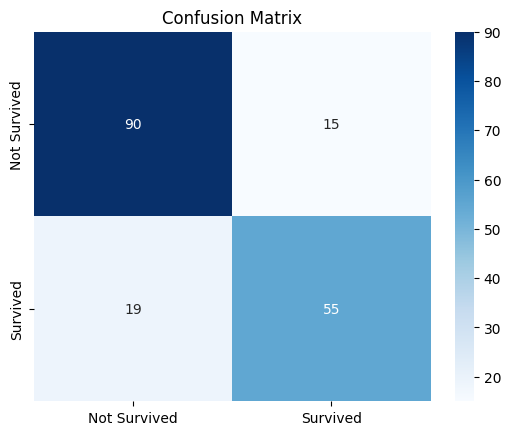

This passenger is predicted to have survived.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
# You can download the dataset from Kaggle and use the path to the CSV file here.
data = pd.read_csv('/content/Titanic-Dataset.csv')

# Display the first few rows of the dataset
print(data.head())

# Data Preprocessing
# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)  # Fill missing age with median age
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)  # Fill missing Embarked with the most common value

# Convert categorical columns to numeric values
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])  # Convert 'male' to 0, 'female' to 1
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])  # Convert Embarked to numeric

# Select relevant features for prediction
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]  # Features (input variables)
y = data['Survived']  # Target variable (what we want to predict)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Display a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.show()

# Example of predicting survival for a new passenger
new_passenger = pd.DataFrame({
    'Pclass': [1],
    'Sex': [1],  # female
    'Age': [25],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [100],
    'Embarked': [1]  # 'C' (Cherbourg)
})

# Predict survival (1 = survived, 0 = did not survive)
prediction = model.predict(new_passenger)
if prediction == 1:
    print("This passenger is predicted to have survived.")
else:
    print("This passenger is predicted to not have survived.")
